In [84]:
import pandas as pd 

In [85]:
df=pd.read_csv('data/finalTrain.csv')

In [86]:
df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [88]:
import geopy

In [89]:
import geopy 
from geopy.distance import geodesic


# calculate distance

def calculate_distance(raw):
    restaurant_cords=(raw['Restaurant_latitude'],raw['Restaurant_longitude'])
    delivery_cords=(raw['Delivery_location_latitude'],raw['Delivery_location_longitude'])
    return geodesic(restaurant_cords,delivery_cords).kilometers

df['distance (in km)']=df.apply(calculate_distance , axis=1)

df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance (in km)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.927795
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484


In [90]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
distance (in km)                  0
dtype: int64

In [91]:
df.duplicated().sum()

0

In [92]:
# segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print('numerical_columns:',numerical_columns)
print('categorical_columns:',categorical_columns)

numerical_columns: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'distance (in km)'],
      dtype='object')
categorical_columns: Index(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [93]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [94]:
df.fillna(df.mode().iloc[0], inplace=True)


In [12]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
distance (in km)               0
dtype: int64

In [95]:
df[categorical_columns].describe()

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,45584,45584,45584,45584,45584,45584,45584,45584,45584,45584
unique,45584,1320,44,176,193,6,4,4,4,2,3
top,0xcdcd,JAPRES11DEL02,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,1192,2192,495,8269,16077,11530,26429,44688,35287


In [14]:
df['Weather_conditions'].value_counts()

Weather_conditions
Fog           8269
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: count, dtype: int64

In [15]:
df['Road_traffic_density'].value_counts()

Road_traffic_density
Low       16077
Jam       14139
Medium    10945
High       4423
Name: count, dtype: int64

In [16]:
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
motorcycle          26429
scooter             15273
electric_scooter     3814
bicycle                68
Name: count, dtype: int64

In [17]:
df['City'].value_counts()

City
Metropolitian    35287
Urban            10133
Semi-Urban         164
Name: count, dtype: int64

In [18]:
df[numerical_columns].describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),distance (in km)
count,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963,99.216342
std,5.695578,0.327663,8.185674,22.885575,7.335562,21.120578,0.839055,0.566240,9.384298,1100.033036
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000,1.463837
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000,4.654185
50%,29.566911,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000,9.247098
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000,13.740932
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000,19709.575543


In [19]:
df['Delivery_person_Age'].value_counts()

Delivery_person_Age
35.000000    2261
36.000000    2260
30.000000    2226
37.000000    2226
38.000000    2218
24.000000    2210
32.000000    2201
22.000000    2194
29.000000    2191
33.000000    2186
28.000000    2179
25.000000    2174
34.000000    2165
26.000000    2159
21.000000    2153
27.000000    2150
39.000000    2144
20.000000    2136
31.000000    2120
23.000000    2086
29.566911    1854
50.000000      53
15.000000      38
Name: count, dtype: int64

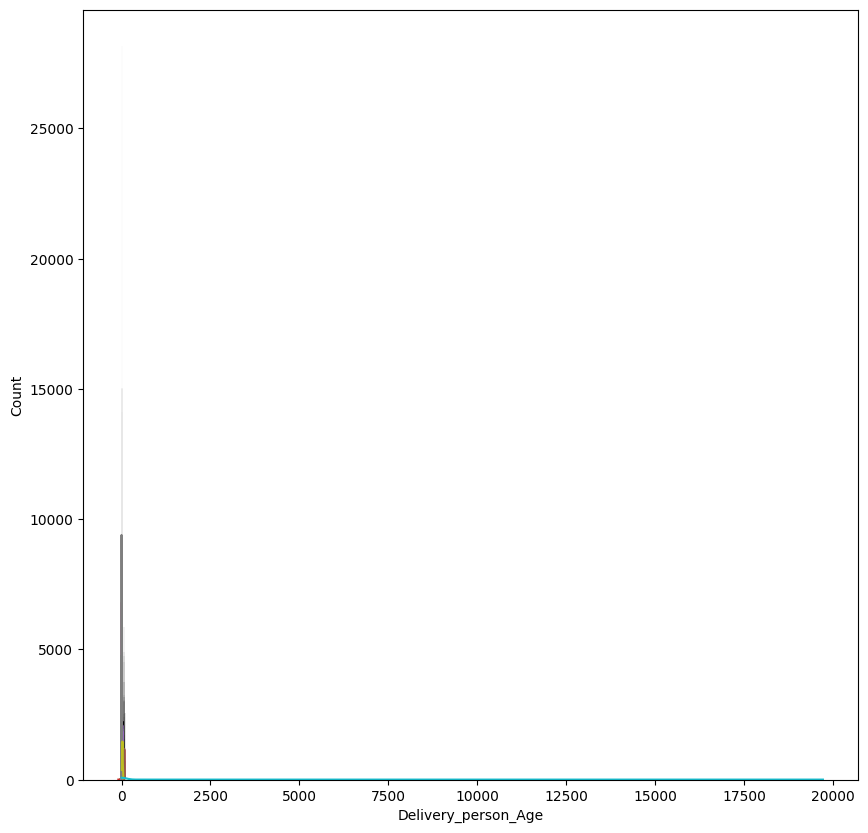

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show


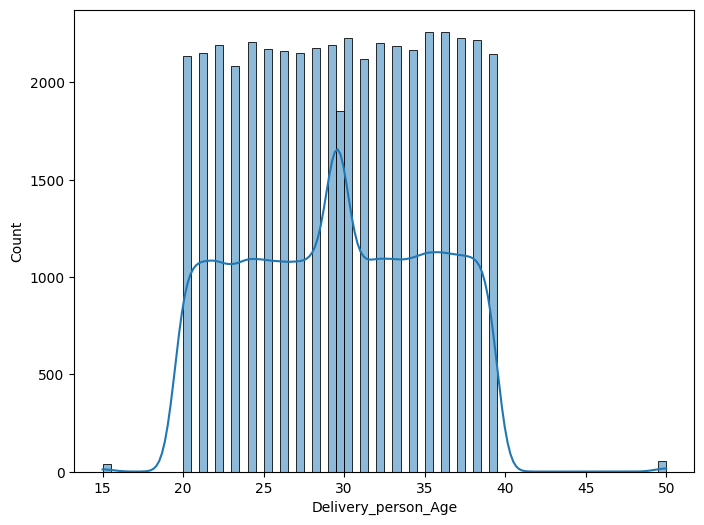

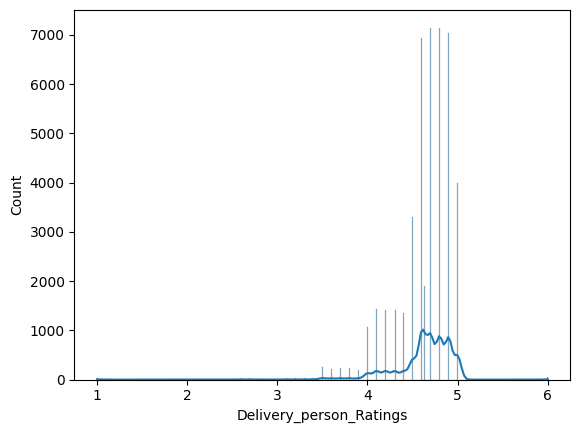

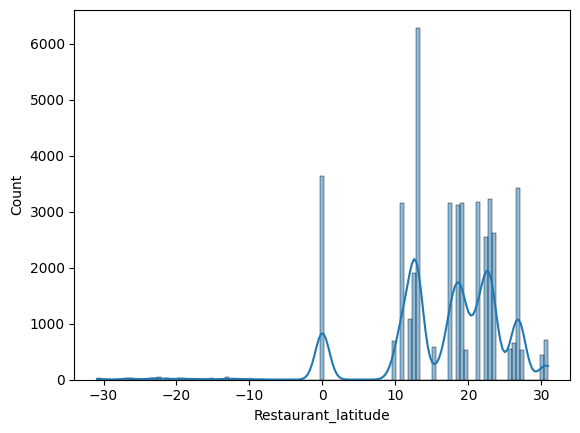

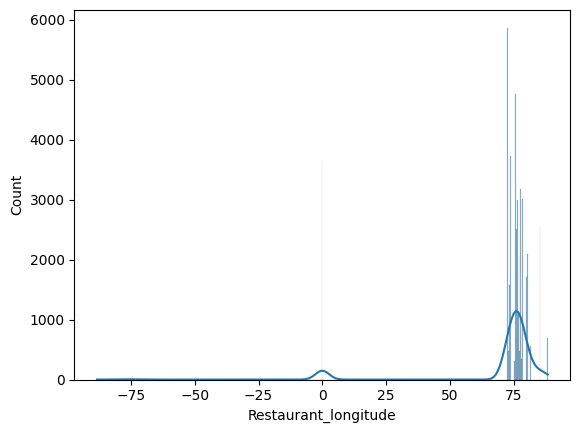

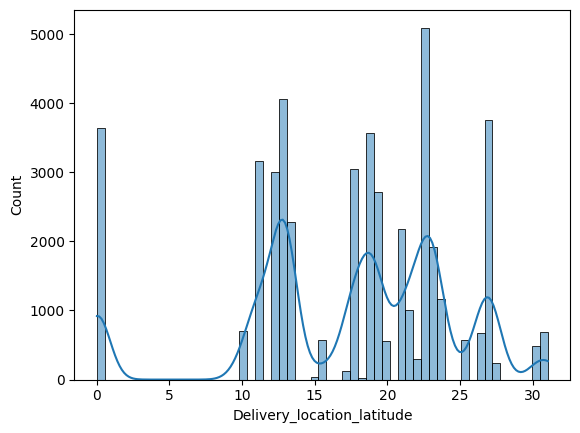

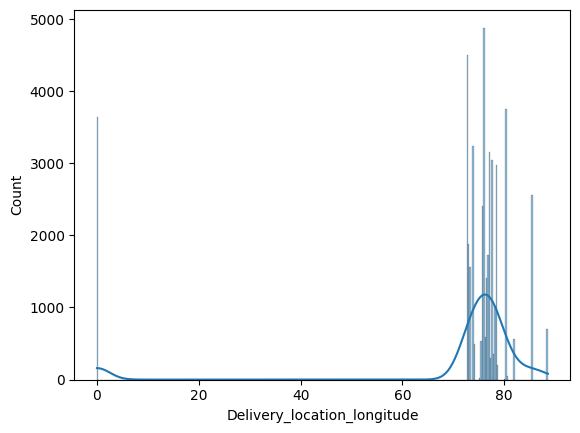

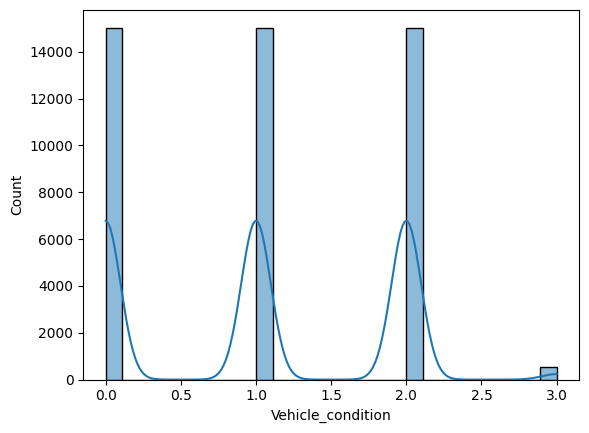

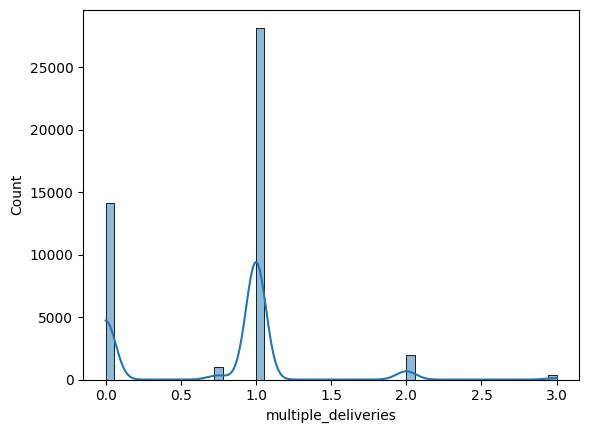

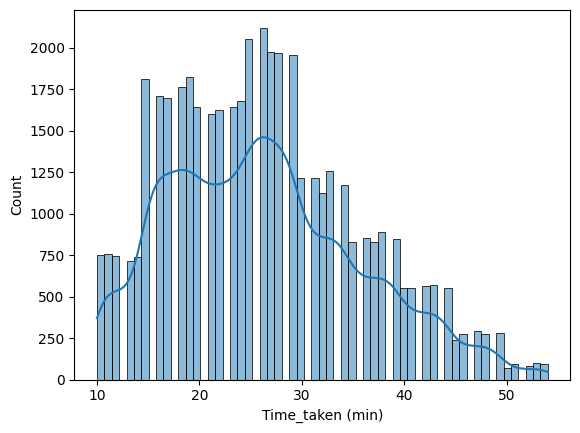

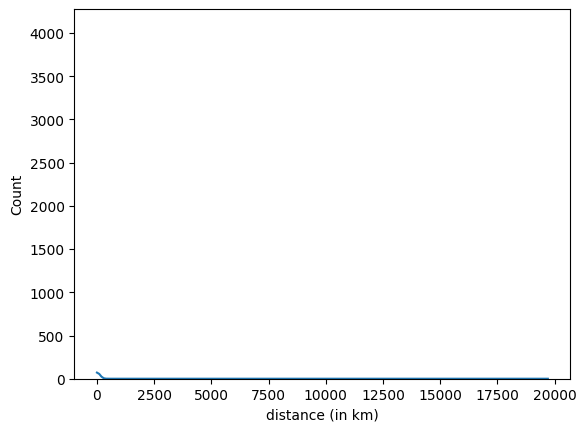

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

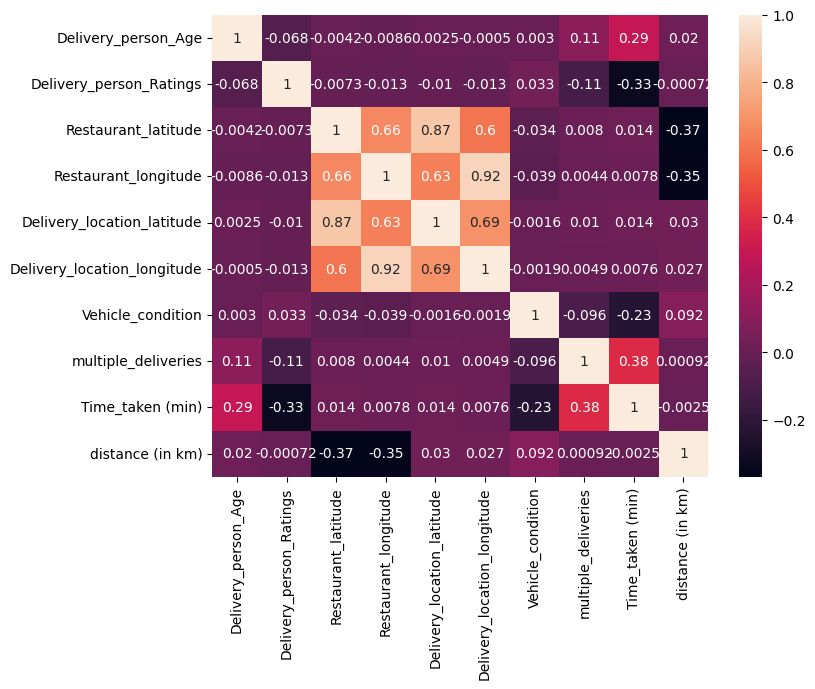

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Display the heatmap
plt.show()

In [78]:
df.head()

,Delivery_person_Age,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance (in km)
0,36.0,21:55,22:10,5.0,4,2,1.0,3.0,1,2,46,10.271464
1,21.0,14:55,15:05,5.0,3,1,1.0,1.0,1,2,23,6.229376
2,23.0,17:30,17:40,5.0,2,1,1.0,1.0,1,2,21,13.764306
3,34.0,09:20,09:30,5.0,1,0,1.0,0.0,1,2,20,2.927795
4,24.0,19:50,20:05,5.0,4,1,1.0,1.0,1,2,41,19.373484


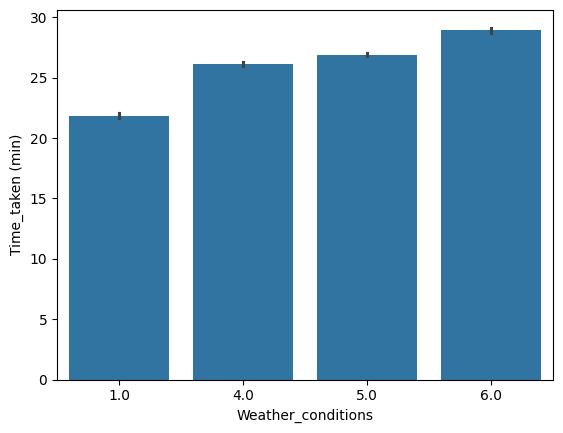

In [79]:
ax=sns.barplot(x="Weather_conditions", y="Time_taken (min)", data=df)

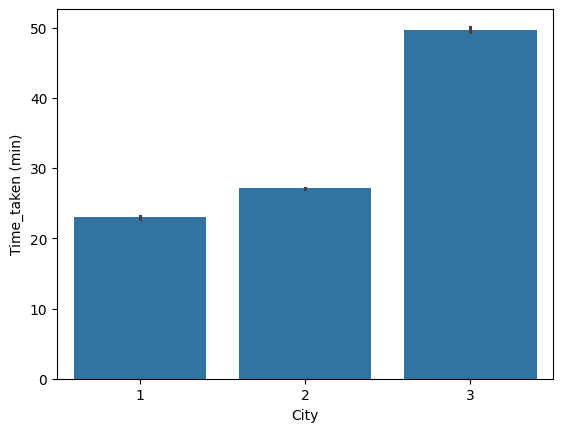

In [80]:
ax=sns.barplot(x="City", y="Time_taken (min)", data=df)

In [96]:
df.drop(labels=["ID", "Delivery_person_ID", "Delivery_person_Ratings", "Restaurant_latitude",
                "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude",
                "Order_Date", "Type_of_order","Time_Orderd"], axis=1,inplace=True)


In [97]:
df.head()

,Delivery_person_Age,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance (in km)
0,36.0,22:10,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,46,10.271464
1,21.0,15:05,Stormy,High,1,motorcycle,1.0,No,Metropolitian,23,6.229376
2,23.0,17:40,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,21,13.764306
3,34.0,09:30,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,20,2.927795
4,24.0,20:05,Fog,Jam,1,scooter,1.0,No,Metropolitian,41,19.373484


In [98]:
df['Weather_conditions'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny'],
      dtype=object)

In [99]:
Weather_conditions_map={'Sunny':1,'Stromy':2,'Sandstroms':3,'Windy':4,'Fog':5, 'Cloudy':6}

In [100]:
df["Road_traffic_density"].unique()

array(['Jam', 'High', 'Medium', 'Low'], dtype=object)

In [101]:
Road_traffic_density_map={'Low':1,'Medium':2,'High':3,'Jam':4}

In [102]:
df["Type_of_vehicle"].unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

In [103]:
Type_of_vehicle_map={'scooter':1,'electric_scooter':2,'bicycle':3,'motercycle':4}

In [104]:
df["Festival"].unique()

array(['No', 'Yes'], dtype=object)

In [105]:
Festival_map={'No':1,'Yes':2,}

In [106]:
df["City"].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban'], dtype=object)

In [107]:
City_map={'Urban':1,'Metropolitian':2,'Semi-Urban':3}

In [108]:
df['Weather_conditions']=df['Weather_conditions'].map(Weather_conditions_map)
df['Road_traffic_density'] = df['Road_traffic_density'].map(Road_traffic_density_map)
df['Type_of_vehicle'] = df['Type_of_vehicle'].map(Type_of_vehicle_map)
df['Festival'] = df['Festival'].map(Festival_map)
df['City'] = df['City'].map(City_map)

In [109]:
df.head()

,Delivery_person_Age,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance (in km)
0,36.0,22:10,5.0,4,2,NaN,3.0,1,2,46,10.271464
1,21.0,15:05,NaN,3,1,NaN,1.0,1,2,23,6.229376
2,23.0,17:40,NaN,2,1,1.0,1.0,1,2,21,13.764306
3,34.0,09:30,NaN,1,0,NaN,0.0,1,2,20,2.927795
4,24.0,20:05,5.0,4,1,1.0,1.0,1,2,41,19.373484


In [74]:
df.isnull().sum()

Delivery_person_Age     0
Time_Orderd             0
Time_Order_picked       0
Weather_conditions      0
Road_traffic_density    0
Vehicle_condition       0
Type_of_vehicle         0
multiple_deliveries     0
Festival                0
City                    0
Time_taken (min)        0
distance (in km)        0
dtype: int64

In [72]:
df.fillna(df.mode().iloc[0], inplace=True)


In [73]:
df.fillna(df.mean(numeric_only=True), inplace=True)
